In [1]:
import sys
# sys.path.append('../')
import os
os.environ['KMP_DUPLICATE_LIB_OK']='True'

import numpy as np
import matplotlib.pyplot as plt
plt.rc('text',usetex=True)
plt.rc('font',family='serif')

from pylab import *
import pickle
from math import log
from torch.nn import parameter

import torch 
import torch.nn as nn

if torch.cuda.is_available():
    torch.set_default_tensor_type('torch.cuda.FloatTensor')

from fracturbulence.common import *
from fracturbulence.Calibration import CalibrationProblem
from fracturbulence.DataGenerator import OnePointSpectraDataGenerator

import constants.consts_exp1 as consts_exp1

from time import time

from pathlib import Path

savedir = Path().resolve() / "data" / "results" 

In [2]:
import fracturbulence as ft

In [3]:
config = {
    'type_EddyLifetime' :   'tauNet', #'TwoThird', #'tauNet', # CALIBRATION : 'tauNet',  ### 'const', TwoThird', 'Mann', 'tauNet'
    'type_PowerSpectra' :   'RDT', ### 'RDT', 'zetaNet', 'C3Net', 'Corrector'
    'nlayers'           :   2,
    'activations': [nn.ReLU(), nn.ReLU()],
    'hlayers' : [10, 10], 
    #'hidden_layer_size' :   10,
    # 'nModes'            :   5, ### number of modes in the rational function in tauNet ### deprecated
    'learn_nu'          :   False, ### NOTE: Experiment 1: False, Experiment 2: True
    'plt_tau'           :   True,
    'plot_loss_wolfe'   :   True, 
    'tol'               :   1.e-3, ### not important
    'lr'                :   1,     ### learning rate
    'penalty'           :   1, # CALIBRATION: 1.e-1,
    'regularization'    :   1.e-5,# CALIBRATION: 1.e-1,
    'nepochs'           :   10,
    'curves'            :   [0,1,2,3],
    'data_type'         :   'Kaimal',  # CALIBRATION: 'Custom', ### 'Kaimal', 'SimiuScanlan', 'SimiuYeo', 'iso'
    'spectra_file'      :   'Spectra.dat',
    'Uref'              :   10, # m/s
    'zref'              :   1, #m
    'domain'            :   torch.logspace(-1, 2, 20), #np.logspace(-4, 2, 40), ### NOTE: Experiment 1: np.logspace(-1, 2, 20), Experiment 2: np.logspace(-2, 2, 40)
    'noisy_data'        :   0.,#0*3.e-1, ### level of the data noise  ### NOTE: Experiment 1: zero, Experiment 2: non-zero
    'output_folder'     :   str(savedir), 
    'input_folder'     :   '/Users/gdeskos/work_in_progress/WindGenerator/script/'
}


[ReLU(), ReLU()]
DataValues is on 0


/home/ai/miniconda3/envs/fracturbulence/lib/python3.9/site-packages/torch/functional.py:504: UserWarning: torch.meshgrid: in an upcoming release, it will be required to pass the indexing argument. (Triggered internally at ../aten/src/ATen/native/TensorShape.cpp:3190.)
  return _VF.meshgrid(tensors, **kwargs)  # type: ignore[attr-defined]


[format_output] -- HERE!

Calibrating MannNet...
torch.Size([80])
Initial loss:  0.09009914950115577

[Calibration.py -- calibrate]-> Epoch 0

loss  =  0.09016357477870217
loss  =  0.8042759198483213
loss  =  0.04032088200042379
loss  =  0.040013499549988604
loss  =  0.03862436740040693
loss  =  0.03856153877008603
loss  =  0.038385356521782404
loss  =  0.0381356754783883
loss  =  0.03757439611199699
loss  =  0.03725858173487879
loss  =  0.03696784569010182
loss  =  0.03689888409481994
loss  =  0.036745886665837196
loss  =  0.03631874435827468
loss  =  0.031782694948517605
loss  =  735.378190526427
loss  =  26.570366648583494
loss  =  0.031526394395031535
loss  =  0.09438342266293243
loss  =  0.031231925530810823
loss  =  0.030604817086835337
loss  =  0.12653565169473957
loss  =  0.030212990028240166
loss  =  0.029165037071080438
loss  =  0.028286070450724513
---------------------------------



[Calibration.py -- calibrate]-> Epoch 1



/home/ai/miniconda3/envs/fracturbulence/lib/python3.9/site-packages/torch/optim/lr_scheduler.py:163: UserWarning: The epoch parameter in `scheduler.step()` was not necessary and is being deprecated where possible. Please use `scheduler.step()` to step the scheduler. During the deprecation, if epoch is different from None, the closed form is used instead of the new chainable form, where available. Please open an issue if you are unable to replicate your use case: https://github.com/pytorch/pytorch/issues/new/choose.
  warnings.warn(EPOCH_DEPRECATION_WARNING, UserWarning)


loss  =  0.028286070450724513
loss  =  0.027463266191798646
loss  =  0.02698331786296858
loss  =  0.025705735733745474
loss  =  0.025396049004920422
loss  =  0.025057683157949463
loss  =  0.024120862282358872
loss  =  0.022987556603553033
loss  =  0.022958736002388912
loss  =  0.022806251064253893
loss  =  0.02256963620464185
loss  =  0.022078629353461103
loss  =  0.021814635770884994
loss  =  0.021183740587351077
loss  =  0.020884551960240423
loss  =  0.021295260918417925
loss  =  0.020612568874431806
loss  =  0.020319167680725586
loss  =  0.02026262016006642
loss  =  0.020234306559219015
loss  =  0.02021163864360227
loss  =  0.020177062601883962
loss  =  0.0202370258965242
loss  =  0.020165970491458296
loss  =  0.02014011489505585
---------------------------------



[Calibration.py -- calibrate]-> Epoch 2

loss  =  0.02014011489505585
loss  =  0.020005587777277272
loss  =  0.020016635787604202
loss  =  0.019858523524762865
loss  =  0.019642777630864156
loss  =  0.019529804021004727


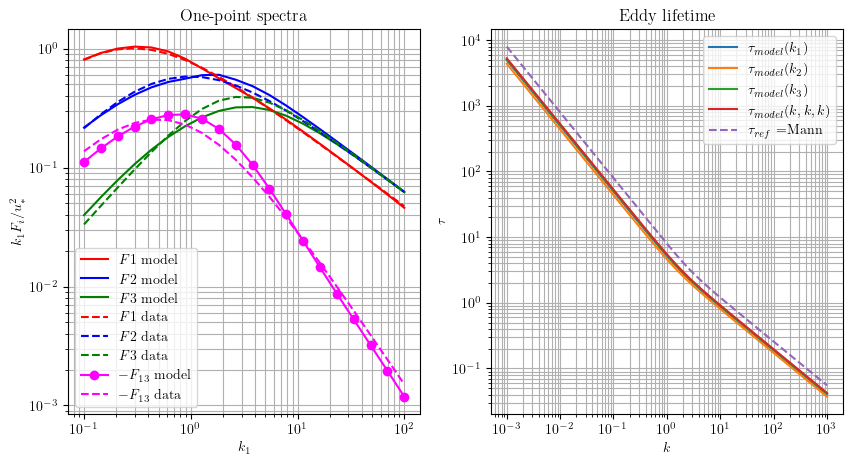

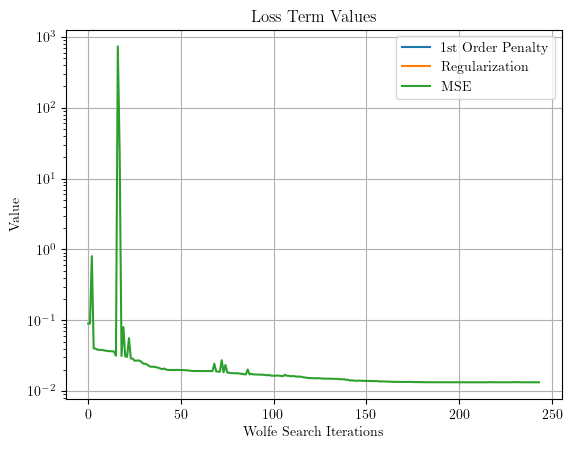

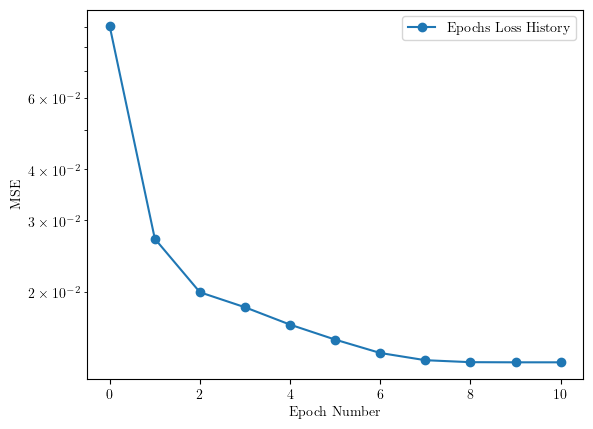

In [4]:
start = time() 

pb = CalibrationProblem(**config)
parameters = pb.parameters
parameters[:3] = [log(consts_exp1.L), log(consts_exp1.Gamma), log(consts_exp1.sigma)] #All of these parameters are positive 
    #so we can train the NN for the log of these parameters. 
pb.parameters = parameters[:len(pb.parameters)]
k1_data_pts = config['domain'] #np.logspace(-1, 2, 20)
DataPoints  = [ (k1, 1) for k1 in k1_data_pts ]
Data = OnePointSpectraDataGenerator(DataPoints=DataPoints, **config).Data

DataValues = Data[1]

IECtau=MannEddyLifetime(k1_data_pts*consts_exp1.L)
kF = pb.eval(k1_data_pts)

opt_params = pb.calibrate(Data=Data, **config)#, OptimizerClass=torch.optim.RMSprop)

plt.figure()

        #plt.plot( pb.loss_history_total, label="Total Loss History")
plt.plot( pb.loss_history_epochs, 'o-', label="Epochs Loss History")
plt.legend() 
plt.xlabel("Epoch Number")
plt.ylabel("MSE")
plt.yscale('log')

plt.show() 


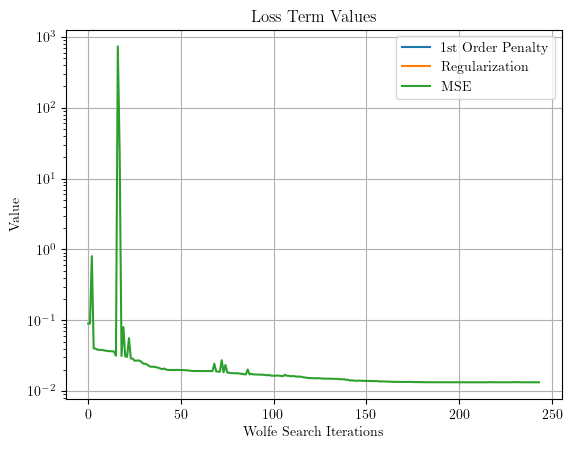

In [5]:
plt.figure()
plt.plot(pb.loss_2ndOpen, label="1st Order Penalty")
plt.plot(pb.loss_reg,  label="Regularization")
plt.plot(pb.loss_history_total, label="MSE")

plt.title("Loss Term Values")

plt.ylabel("Value")
plt.xlabel("Wolfe Search Iterations")
plt.yscale('log')
plt.legend()
plt.grid('true')
plt.show()
